<a href="https://colab.research.google.com/github/Dewangga027/CNN_5_Classification/blob/main/TA_Surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tahap 1: PreProcessing Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel ('/content/frozenfood.xlsx')
df.head()

,TGL,KODEBARA,NAMABARA,QTY,SATUAN,HARGA,JUMLAH,NAMA
0,2020-04-01,JOF-022,JOFRANS NUGGET AYAM REG. 225 GR X 24 PAK,1,DUS,240000,240000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
1,2020-04-01,JOF-002,JOFRANS NUGGET AYAM REG. 500 GR X 12 PAK,1,DUS,216000,216000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
2,2020-04-01,OKEY-003,OKEY STICK 500 GR X 10 PACK,1,DUS,190000,190000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
3,2020-04-01,OKEY-001,OKEY SOSIS 500 GR X 20 PACK,1,DUS,380000,380000,F - (MITRAKU) TOKO SALMAINI HABABAHAN
4,2020-04-01,BLF-001,BELFOODS SOSIS AYAM 500 GR X 12 PACK,1,DUS,204000,204000,F - (MITRAKU) TOKO SALMAINI HABABAHAN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6778 entries, 0 to 6777
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   TGL       6778 non-null   datetime64[ns]
 1   KODEBARA  6778 non-null   object        
 2   NAMABARA  6778 non-null   object        
 3   QTY       6778 non-null   int64         
 4   SATUAN    6778 non-null   object        
 5   HARGA     6778 non-null   int64         
 6   JUMLAH    6778 non-null   int64         
 7   NAMA      6778 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 423.8+ KB


In [ ]:
# Cek missing value
df.isnull().sum()

,0
TGL,0
KODEBARA,0
NAMABARA,0
QTY,0
SATUAN,0
HARGA,0
JUMLAH,0
NAMA,0


In [ ]:
df.dropna(inplace=True)
df['TGL'] = pd.to_datetime(df['TGL']) # convert ke tipe date

In [ ]:
df_duplicate = df.copy()

In [ ]:
satuan_mapping = {
    'BAL': 10,     # contoh: 1 BAL = 10 pcs
    'BALL': 10,
    'BKS': 5,
    'DUS': 12,
    'JRG': 6,
    'PAC': 5,
    'PACK': 5,
    'PAIL': 20,
    'PCS': 1
}

In [ ]:
df_duplicate['KONVERSI'] = df_duplicate['SATUAN'].map(satuan_mapping)
df_duplicate['JUMLAH_UNIT'] = df_duplicate['QTY'] * df_duplicate['KONVERSI']

In [ ]:
# Ekstrak brand dari NAMABARA
df_duplicate['BRAND'] = df_duplicate['NAMABARA'].str.split().str[0]

# Label Encoding
le_nama = LabelEncoder()
df_duplicate['NAMA_encoded'] = le_nama.fit_transform(df_duplicate['NAMA'])

le_kodebara = LabelEncoder()
df_duplicate['KODEBARA_encoded'] = le_kodebara.fit_transform(df_duplicate['KODEBARA'])

le_brand = LabelEncoder()
df_duplicate['BRAND_encoded'] = le_brand.fit_transform(df_duplicate['BRAND'])


In [ ]:
# Split data into train and test
train_df, test_df = train_test_split(df_duplicate, test_size=0.2, random_state=42)

In [ ]:
# Ekstrak waktu
df_duplicate['Bulan'] = df_duplicate['TGL'].dt.month
df_duplicate['Tahun'] = df_duplicate['TGL'].dt.year

In [ ]:
df_duplicate

,TGL,KODEBARA,NAMABARA,QTY,SATUAN,HARGA,JUMLAH,NAMA,KONVERSI,JUMLAH_UNIT,BRAND,NAMA_encoded,KODEBARA_encoded,BRAND_encoded,Bulan,Tahun
0,2020-04-01,JOF-022,JOFRANS NUGGET AYAM REG. 225 GR X 24 PAK,1,DUS,240000,240000,F - (MITRAKU) TOKO SALMAINI HABABAHAN,12,12,JOFRANS,124,128,36,4,2020
1,2020-04-01,JOF-002,JOFRANS NUGGET AYAM REG. 500 GR X 12 PAK,1,DUS,216000,216000,F - (MITRAKU) TOKO SALMAINI HABABAHAN,12,12,JOFRANS,124,113,36,4,2020
2,2020-04-01,OKEY-003,OKEY STICK 500 GR X 10 PACK,1,DUS,190000,190000,F - (MITRAKU) TOKO SALMAINI HABABAHAN,12,12,OKEY,124,229,59,4,2020
3,2020-04-01,OKEY-001,OKEY SOSIS 500 GR X 20 PACK,1,DUS,380000,380000,F - (MITRAKU) TOKO SALMAINI HABABAHAN,12,12,OKEY,124,227,59,4,2020
4,2020-04-01,BLF-001,BELFOODS SOSIS AYAM 500 GR X 12 PACK,1,DUS,204000,204000,F - (MITRAKU) TOKO SALMAINI HABABAHAN,12,12,BELFOODS,124,32,8,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6773,2020-09-30,OKEY-001,OKEY SOSIS 500 GR X 20 PACK,3,DUS,380000,1140000,F - ACHIKA JAYA,12,36,OKEY,128,227,59,9,2020
6774,2020-09-30,MIN-001,MINAKU OTAK OTAK 500 GR X 20 PACK,1,DUS,360000,360000,F - ACHIKA JAYA,12,12,MINAKU,128,183,54,9,2020
6775,2020-09-30,INDO-002,INDOESKRIM 8 LTR VANILLA,30,PAIL,145000,4350000,TOKO CITA RASA BARU,20,600,INDOESKRIM,218,104,33,9,2020
6776,2020-09-30,DEL-001,DELMONTE CHILI EXT HOT PCH 1 KG X 10 PCS,3,DUS,175000,525000,TOKO CITA RASA BARU,12,36,DELMONTE,218,60,20,9,2020


# Tahap 2: Eksplorasi Data

In [ ]:
print(df_duplicate['KODEBARA'].value_counts())
print(df_duplicate['SATUAN'].value_counts())
print(df_duplicate['NAMA'].value_counts())

KODEBARA
MIN-001     378
OKEY-001    288
OKEY-003    278
JOF-023     244
JOF-024     217
           ... 
CIR-010       1
EURO-003      1
CHOP-003      1
KRD-004       1
BER-004       1
Name: count, Length: 268, dtype: int64
SATUAN
DUS     3097
PACK    2837
PAIL     510
BAL      155
BKS       87
PCS       58
PAC       18
JRG       11
BALL       5
Name: count, dtype: int64
NAMA
CASH                                  656
TOKO CITA RASA BARU                   432
AL - AMANAH FROZEN                    354
ADEK FROZEN                           202
F - (MITRAKU) PT. DINAMIKA BUAH N.    190
                                     ... 
MIAMI - WARDI                           1
OPUNG SIANTAR                           1
Y - IBUK CAROLINA NAGA MAS              1
F - CAFE HANGTUAH                       1
FRESH SUN SWALAYAN                      1
Name: count, Length: 229, dtype: int64


Text(0.5, 0, 'Bulan')

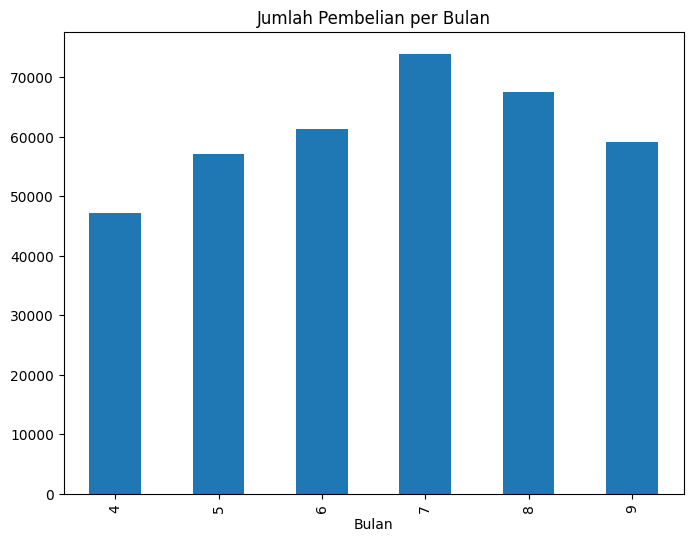

In [ ]:
# Visualisasi Bulanan
purchase_by_month = df_duplicate.groupby('Bulan')['JUMLAH_UNIT'].sum()
purchase_by_month.plot(kind='bar', figsize=(8,6), title='Jumlah Pembelian per Bulan')
plt.xlabel('Bulan')

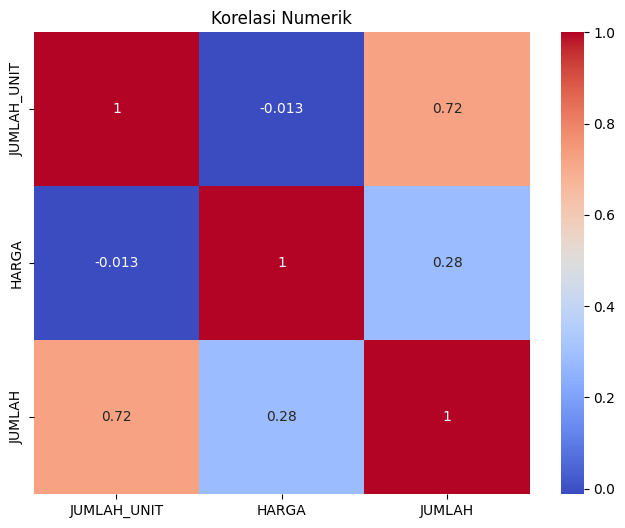

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df_duplicate[['JUMLAH_UNIT', 'HARGA', 'JUMLAH']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Numerik')
plt.show()

# Tahap 3: Membangun Matriks


In [ ]:
# Matriks frekuensi berdasarkan jumlah unit
user_item_matrix = train_df.pivot_table(index='NAMA_encoded', columns='KODEBARA_encoded', values='JUMLAH_UNIT', aggfunc='sum', fill_value=0)
item_user_matrix = user_item_matrix.T
brand_user_matrix = train_df.pivot_table(index='NAMA_encoded', columns='BRAND_encoded', values='JUMLAH_UNIT', aggfunc='sum', fill_value=0)

# Tahap 4: Menghitung Similarity

In [ ]:
# Similarity
user_similarity = cosine_similarity(user_item_matrix)
item_similarity = cosine_similarity(item_user_matrix)
brand_similarity = cosine_similarity(brand_user_matrix)

# Tahap 5: Implementasi KNN


In [ ]:
model_knn_users = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(8, len(user_item_matrix)))
model_knn_users.fit(user_item_matrix)

model_knn_items = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(8, len(item_user_matrix)))
model_knn_items.fit(item_user_matrix)

model_knn_brands = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=min(8, len(brand_user_matrix)))
model_knn_brands.fit(brand_user_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=8)

# Tahap 6: Membuat Rekomendasi


In [ ]:
# Fungsi Rekomendasi
def recommend_by_user(selected_items, user_item_matrix, model_knn, similarity_matrix, top_n=5, threshold=0.5, df_reference=df_duplicate):
    relevant_users = set()
    for item in selected_items:
        if item in user_item_matrix.columns:
            buyers = user_item_matrix[user_item_matrix[item] > 0].index.tolist()
            relevant_users.update(buyers)
    if not relevant_users:
        return pd.DataFrame()

    recommended_items = Counter()
    user_indices = list(user_item_matrix.index)
    similarity_df = pd.DataFrame(similarity_matrix, index=user_indices, columns=user_indices)

    for user_id in relevant_users:
        if user_id in user_indices:
            distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id].values.reshape(1, -1), n_neighbors=min(top_n+1, len(user_indices)))
            for neighbor_idx in indices.flatten()[1:]:
                neighbor_id = user_indices[neighbor_idx]
                if similarity_df.loc[user_id, neighbor_id] > threshold:
                    purchased_items = user_item_matrix.loc[neighbor_id]
                    for item, value in purchased_items[purchased_items > 0].items():
                        recommended_items[item] += value
    top_items = [int(item) for item, _ in recommended_items.most_common(top_n)]
    return df_reference[df_reference['KODEBARA_encoded'].isin(top_items)][['KODEBARA', 'NAMABARA']].drop_duplicates().reset_index(drop=True)

In [ ]:
def recommend_by_item(selected_items, item_user_matrix, model_knn, top_n=5, threshold=0.5, df_reference=df_duplicate):
    if not selected_items:
        return pd.DataFrame()
    recommended_items = Counter()
    for item in selected_items:
        if item in item_user_matrix.index:
            distances, indices = model_knn.kneighbors(item_user_matrix.loc[item].values.reshape(1, -1), n_neighbors=min(top_n+1, len(item_user_matrix)))
            for idx in indices.flatten()[1:]:
                neighbor_item = item_user_matrix.index[idx]
                recommended_items[neighbor_item] += 1
    top_items = [int(item) for item, _ in recommended_items.most_common(top_n)]
    return df_reference[df_reference['KODEBARA_encoded'].isin(top_items)][['KODEBARA', 'NAMABARA']].drop_duplicates().reset_index(drop=True)

In [ ]:
def recommend_by_brand(selected_items, brand_user_matrix, user_item_matrix, train_df, top_n=5, threshold=0.5, df_reference=df_duplicate):
    if not selected_items:
        return pd.DataFrame()
    selected_brands = train_df[train_df['KODEBARA_encoded'].isin(selected_items)]['BRAND_encoded'].unique()
    if len(selected_brands) == 0:
        return pd.DataFrame()

    recommended_items = Counter()
    for brand in selected_brands:
        if brand in brand_user_matrix.columns:
            users = brand_user_matrix[brand_user_matrix[brand] > 0].index.tolist()
            for user_id in users:
                purchased_items = user_item_matrix.loc[user_id]
                for item, value in purchased_items[purchased_items > 0].items():
                    recommended_items[item] += value
    top_items = [int(item) for item, _ in recommended_items.most_common(top_n)]
    return df_reference[df_reference['KODEBARA_encoded'].isin(top_items)][['KODEBARA', 'NAMABARA']].drop_duplicates().reset_index(drop=True)

# Tahap 6: Evaluasi Model

In [ ]:
# Fungsi evaluasi
def evaluate_recommendations(selected_items, recommendations, train_df):
    relevant_users = test_df[test_df['KODEBARA_encoded'].isin(selected_items)]['NAMA_encoded'].unique()
    if len(relevant_users) == 0:
        return 0, 0, 0

    true_items = test_df[test_df['NAMA_encoded'].isin(relevant_users)]['KODEBARA_encoded'].unique()
    # Get 'KODEBARA_encoded' values from df_duplicate based on 'KODEBARA' in recommendations
    recommended_items = df_duplicate[df_duplicate['KODEBARA'].isin(recommendations['KODEBARA'])]['KODEBARA_encoded'].values

    true_set = set(true_items)
    recommended_set = set(recommended_items)
    true_positive = len(true_set & recommended_set)

    precision = true_positive / len(recommended_set) if recommended_set else 0
    recall = true_positive / len(true_set) if true_set else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall else 0
    return precision, recall, f1


In [ ]:
# Contoh selected item
selected_items = [10, 50, 80]  # KODEBARA_encoded (pastikan ini dari hasil encoding)

# Rekomendasi dan tampilan
recommend_item_df = recommend_by_item(selected_items, item_user_matrix, model_knn_items, df_reference=df_duplicate)
recommend_user_df = recommend_by_user(selected_items, user_item_matrix, model_knn_users, user_similarity, df_reference=df_duplicate)
recommend_brand_df = recommend_by_brand(selected_items, brand_user_matrix, user_item_matrix, train_df, df_reference=df_duplicate)

print("=== Rekomendasi Berdasarkan Item Similarity ===")
print(recommend_item_df)
print("\n=== Rekomendasi Berdasarkan User Similarity ===")
print(recommend_user_df)
print("\n=== Rekomendasi Berdasarkan Brand Similarity ===")
print(recommend_brand_df)

In [ ]:
# Evaluasi
precision_item, recall_item, f1_item = evaluate_recommendations(selected_items, recommend_item_df, test_df)
precision_user, recall_user, f1_user = evaluate_recommendations(selected_items, recommend_user_df, test_df)
precision_brand, recall_brand, f1_brand = evaluate_recommendations(selected_items, recommend_brand_df, test_df)

print("\nEvaluasi Item Similarity: Precision =", precision_item, "Recall =", recall_item, "F1 =", f1_item)
print("Evaluasi User Similarity: Precision =", precision_user, "Recall =", recall_user, "F1 =", f1_user)
print("Evaluasi Brand Similarity: Precision =", precision_brand, "Recall =", recall_brand, "F1 =", f1_brand)

In [ ]:
# Kombinasi rekomendasi
# Concatenate DataFrames instead of lists, and drop duplicates
final_recommendations = pd.concat([recommend_user_df, recommend_item_df, recommend_brand_df]).drop_duplicates()
precision, recall, f1 = evaluate_recommendations(selected_items, final_recommendations, test_df)
print("Evaluasi Kombinasi Rekomendasi: Precision=", precision, "Recall=", recall, "F1-score=", f1)